# 4.5 統計モデルの設計

In [2]:
using Distributions
using PyPlot

In [3]:
function set_options(ax, xlabel, ylabel, title;
                     grid=true, gridy=false, legend=false)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    if grid
        if gridy
            ax.grid(axis="y")
        else
            ax.grid()
        end
    end
    legend && ax.legend()
    return
end

set_options (generic function with 1 method)

## 4.5.2 混合分布

In [4]:
# パラメータを生成するための分布
μ₁ = [-1.0, 1.0]
Σ₁ = [0.2 0.0;
      0.0 0.2]
μ₂ = [1.0, -1.0]
Σ₂ = [0.4 0.0;
      0.0 0.4]
p = 0.3

# サンプリングする回数
N = 100

# 生成データを保存する配列
X = Array{Float64}(undef, 2, N)

# 選択された分布を示す配列（潜在変数）
S = Array{Bool}(undef, N)

for i in 1:N
    # 潜在変数のサンプル
    S[i] = rand(Bernoulli(p))
    
    # 潜在変数の値に応じて多変量正規分布のパラメータを切り替える
    (μ, Σ) = S[i] == 1 ? (μ₁, Σ₁) : (μ₂, Σ₂)
    
    # データをサンプリングする
    X[:, i] = rand(MvNormal(μ, Σ))
end

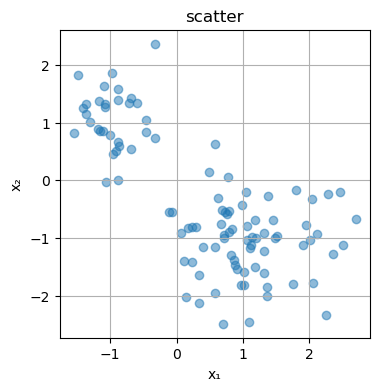

In [5]:
fig, ax = subplots(figsize=(4,4))
ax.scatter(X[1,:], X[2,:], alpha=0.5)
set_options(ax, "x₁", "x₂", "scatter")

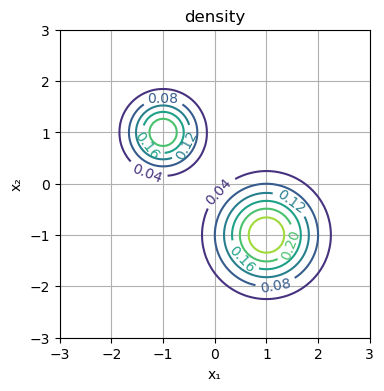

In [6]:
# 混合多変量正規分布の確率密度分布
pdfgmm(x) = p*pdf(MvNormal(μ₁, Σ₁), x) + (1-p)*pdf(MvNormal(μ₂, Σ₂), x)

x₁s = range(-3, 3, length=100)
x₂s = range(-3, 3, length=100)

fig, ax = subplots(figsize=(4,4))
cs = ax.contour(x₁s, x₂s, [pdfgmm([x₁, x₂]) for x₁ in x₁s, x₂ in x₂s]')
ax.clabel(cs, inline=true)
set_options(ax, "x₁", "x₂", "density")